In [30]:
import torch
import torchvision
from torchvision.io.image import decode_image
from torchvision.models.detection import fasterrcnn_resnet50_fpn_v2, FasterRCNN_ResNet50_FPN_V2_Weights
from torchvision.models.detection import SSD300_VGG16_Weights
from torchvision.utils import draw_bounding_boxes
from torchvision.transforms.functional import to_pil_image
from PIL import Image


In [ ]:
img = decode_image("/home/kien/Desktop/projects/Amir_research/yolo/datasets/coco8/images/train/000000000009.jpg")

# Step 1: Initialize model with the best available weights
weights = FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT
model = fasterrcnn_resnet50_fpn_v2(weights=weights, box_score_thresh=0.9)
model.eval()

# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

# Step 3: Apply inference preprocessing transforms
batch = [preprocess(img)]

# Step 4: Use the model and visualize the prediction
prediction = model(batch)[0]
labels = [weights.meta["categories"][i] for i in prediction["labels"]]
box = draw_bounding_boxes(img, boxes=prediction["boxes"],
                          labels=labels,
                          colors="red",
                          width=4, font_size=30)
im = to_pil_image(box.detach())
im.show()

In [5]:
weights.meta

{'categories': ['__background__',
  'person',
  'bicycle',
  'car',
  'motorcycle',
  'airplane',
  'bus',
  'train',
  'truck',
  'boat',
  'traffic light',
  'fire hydrant',
  'N/A',
  'stop sign',
  'parking meter',
  'bench',
  'bird',
  'cat',
  'dog',
  'horse',
  'sheep',
  'cow',
  'elephant',
  'bear',
  'zebra',
  'giraffe',
  'N/A',
  'backpack',
  'umbrella',
  'N/A',
  'N/A',
  'handbag',
  'tie',
  'suitcase',
  'frisbee',
  'skis',
  'snowboard',
  'sports ball',
  'kite',
  'baseball bat',
  'baseball glove',
  'skateboard',
  'surfboard',
  'tennis racket',
  'bottle',
  'N/A',
  'wine glass',
  'cup',
  'fork',
  'knife',
  'spoon',
  'bowl',
  'banana',
  'apple',
  'sandwich',
  'orange',
  'broccoli',
  'carrot',
  'hot dog',
  'pizza',
  'donut',
  'cake',
  'chair',
  'couch',
  'potted plant',
  'bed',
  'N/A',
  'dining table',
  'N/A',
  'N/A',
  'toilet',
  'N/A',
  'tv',
  'laptop',
  'mouse',
  'remote',
  'keyboard',
  'cell phone',
  'microwave',
  'oven'

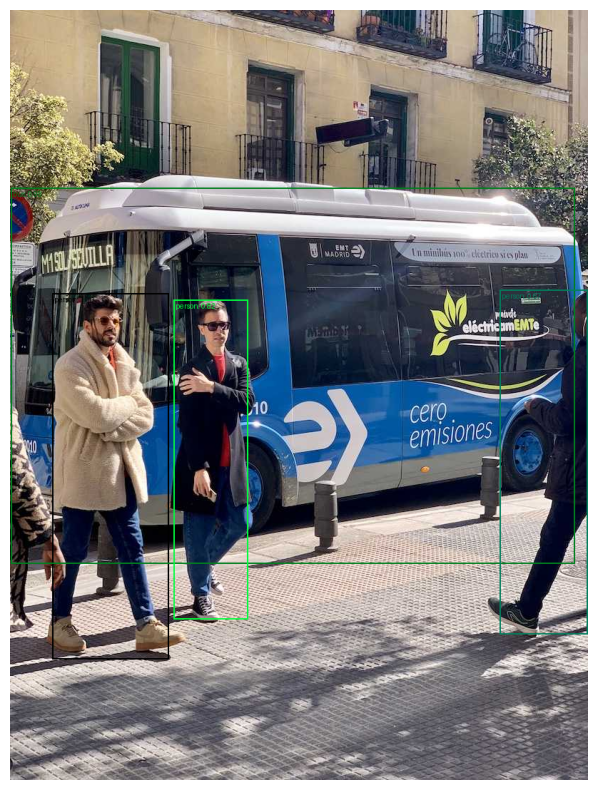

In [53]:
# pip install torch torchvision pillow --upgrade

import matplotlib.pyplot as plt
import torch
from PIL import Image
import torchvision.transforms.functional as F
from torchvision.utils import draw_bounding_boxes
from torchvision.models.detection import ssd300_vgg16, SSD300_VGG16_Weights
import pathlib

# -------- 1) Model + weights + categories --------
weights = SSD300_VGG16_Weights.COCO_V1
model = ssd300_vgg16(weights=weights).eval()
categories = weights.meta["categories"]
preprocess = weights.transforms()  # expects a PIL Image

# Optional: pick GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# -------- 2) Load PIL image --------
img_path = "../pretrain_yolo/bus.jpg"  # change me
img_pil = Image.open(img_path).convert("RGB")   # <- PIL Image (important!)

# -------- 3) Preprocess (PIL -> Tensor) and run inference --------
with torch.no_grad():
    # preprocess returns a CHW float tensor with the proper resize/normalize
    input_tensor = preprocess(img_pil).to(device)
    outputs = model([input_tensor])

pred = outputs[0]  # dict with "boxes", "labels", "scores"

# -------- 4) Filter by confidence and map labels --------
conf_thresh = 0.5
keep = pred["scores"] >= conf_thresh

boxes  = pred["boxes"][keep]  # (N, 4) in [x1, y1, x2, y2] on original image coords
labels = pred["labels"][keep]
scores = pred["scores"][keep]

label_text = [f"{categories[i]}: {s:.2f}" for i, s in zip(labels.tolist(), scores.tolist())]

# -------- 5) Draw boxes on the ORIGINAL image --------
# draw_bounding_boxes expects a uint8 tensor in CHW
img_uint8 = F.pil_to_tensor(img_pil)  # uint8 CHW
boxed = draw_bounding_boxes(img_uint8, boxes, labels=label_text, width=2)

# back to PIL and save
out_pil = F.to_pil_image(boxed)
plt.figure(figsize=(10,10))
plt.imshow(out_pil)
plt.axis("off")
plt.show()
# out_path = pathlib.Path(img_path).with_stem(pathlib.Path(img_path).stem + "_detections")
# out_pil.save(out_path.with_suffix(".jpg"))

# print(f"Saved: {out_path.with_suffix('.jpg')}")
# print(f"Detections: {len(boxes)} objects @ conf ≥ {conf_thresh}")
# for b, lbl, sc in zip(boxes.tolist(), labels.tolist(), scores.tolist()):
#     print(f"- {categories[lbl]:<15} {sc:.2f}  box={list(map(int, b))}")


In [65]:
labels.tolist()

[1, 6, 1, 1]

In [72]:
model.transform

GeneralizedRCNNTransform(
    Normalize(mean=[0.48235, 0.45882, 0.40784], std=[0.00392156862745098, 0.00392156862745098, 0.00392156862745098])
    Resize(min_size=(300,), max_size=300, mode='bilinear')
)

In [73]:
model

SSD(
  (backbone): SSDFeatureExtractorVGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=